<img src="escuela_economia_una_logo.png" width="260" height="60">
<center>
    <b>Econometría</b><br>
    <b>Profesor:  Alexander Amoretti</b><br>
    <b>Desarrollo:  Diego Armando Barquero Sánchez, Estudiante de Tercer Ciclo</b>
<br><br>   
<div style="font-size:200%;color:white; background-color: #630b57;">Experimento de Montecarlo</div>
<div style="font-size:100%;color:white; background-color: #630b57;">Simulación de 1000 experimentos</div>

<i>Creado:     2023-Jul-31 
    <br>
    Actualizado: 2023-Ago-02 </i>

## *Librerías*

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import kurtosis
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import random
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## *Se definen los valores reales del intercepto y pendiente*

In [16]:
intercepto_real = 25
pendiente_real = 0.5

## *Se establece el número de observaciones, así como el número de experimentos que se desean hacer de Monte Carlo*

In [17]:
# Número de observaciones en cada experimento
num_observaciones = 1000

# Número de experimentos a realizar 
num_experimentos = 1000

## *Creamos Arrays que nos permitan almacenar los resultados de los experimentos*

In [18]:
# Np.zeros lo que genera es un Array que es similar a una lista llena de ceros ** Quitar los # en los prints para visualizar **
interceptos_estimados = np.zeros(num_experimentos)
pendientes_estimadas = np.zeros(num_experimentos)
#print(interceptos_estimados)
#print(pendientes_estimadas)

## *Desarrollamos los experimentos de Monte Carlo*

In [19]:
np.random.seed(777)
for i in range(num_experimentos):
    # Generamos datos aleatorios con ruido blanco
    # La semilla aleatoria es por las computadores no entienden lo aleatorio
    X = np.random.rand(num_observaciones, 1) # Generamos X´s aleatorias con 1000 observaciones durante 100 experimentos
    y = intercepto_real + pendiente_real * X + np.random.normal(0, 1, size=(num_observaciones, 1)) # Realizo la regresión real
    
    # Utilizo LinearRegression() para hacer la regresión con las X´s generadas
    model = LinearRegression()
    model.fit(X, y)
    
    # Alamaceno los resultados para cada experimento dentro de los Arrays lleno de ceros
    interceptos_estimados[i] = model.intercept_[0]
    pendientes_estimadas[i] = model.coef_[0][0]

# Calculamos el valor esperado y la desviación de los parámetos estimados
media_intercepto = np.mean(interceptos_estimados)
media_pendiente = np.mean(pendientes_estimadas)
std_intercepto = np.std(interceptos_estimados)
std_pendiente = np.std(pendientes_estimadas)


# Imprimimos los resultados
print("Valor real de β0:", intercepto_real)
print("___"*20)
print("Valor medio de β0^:", media_intercepto)
print("___"*20)
print("Desviación estándar de β0^:", std_intercepto)
print("___"*20)
print("Valor real de β1:", pendiente_real)
print("___"*20)
print("Valor medio de β1^:", media_pendiente)
print("___"*20)
print("Desviación estándar de β1^:", std_pendiente)
print("___"*20)

Valor real de β0: 25
____________________________________________________________
Valor medio de β0^: 24.99947116682303
____________________________________________________________
Desviación estándar de β0^: 0.06215078497762004
____________________________________________________________
Valor real de β1: 0.5
____________________________________________________________
Valor medio de β1^: 0.49863471934017267
____________________________________________________________
Desviación estándar de β1^: 0.10573599508424827
____________________________________________________________


## *Gráfico de Convergencia* 
- β0
- Intérvalo de Confianza = ( media - 2*std, media + 2*std )

In [20]:
lim_inf_β0 = media_intercepto - 2*std_intercepto
lim_sup_β0 = media_intercepto + 2*std_intercepto

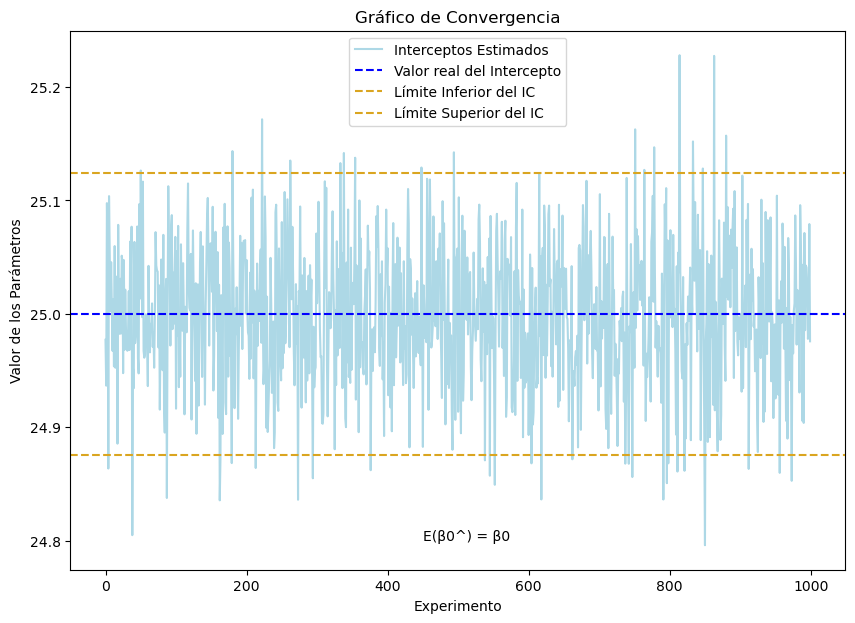

In [21]:
# Utilizamos Matplotlib
plt.figure(figsize=(10, 7))
plt.plot(range(num_experimentos), interceptos_estimados, label='Interceptos Estimados', color='lightblue')
plt.axhline(intercepto_real, color='blue', linestyle='--', label='Valor real del Intercepto')
plt.axhline(lim_inf_β0, color='goldenrod', linestyle='--', label='Límite Inferior del IC')
plt.axhline(lim_sup_β0, color='goldenrod', linestyle='--', label='Límite Superior del IC')
plt.xlabel('Experimento')
plt.ylabel('Valor de los Parámetros')
plt.legend(loc='best')
plt.title('Gráfico de Convergencia')
plt.text(450,24.8, "E(β0^) = β0")
plt.show()

## *Gráfico de Convergencia* 
- β1 
- Intérvalo de Confianza = ( media - 2*std, media + 2*std )

In [22]:
lim_inf_β1 = media_pendiente - 2*std_pendiente
lim_sup_β1 = media_pendiente + 2*std_pendiente

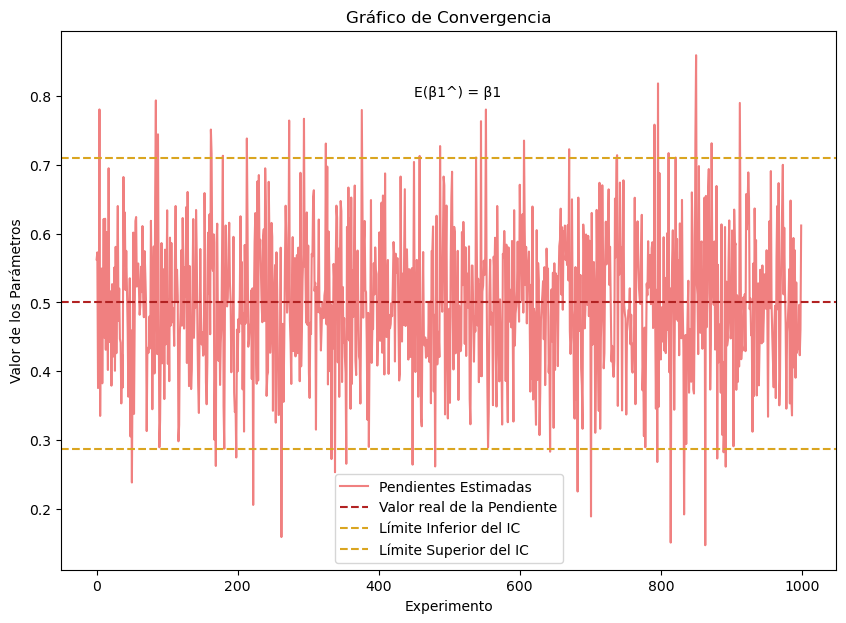

In [23]:
# Utilizamos Matplotlib
plt.figure(figsize=(10, 7))
plt.plot(range(num_experimentos), pendientes_estimadas, label='Pendientes Estimadas', color='lightcoral')
plt.axhline(pendiente_real, color='firebrick', linestyle='--', label='Valor real de la Pendiente')
plt.axhline(lim_inf_β1, color='goldenrod', linestyle='--', label='Límite Inferior del IC')
plt.axhline(lim_sup_β1, color='goldenrod', linestyle='--', label='Límite Superior del IC')
plt.xlabel('Experimento')
plt.ylabel('Valor de los Parámetros')
plt.legend()
plt.title('Gráfico de Convergencia')
plt.text(450,0.8, "E(β1^) = β1")
plt.show()

## *Gráfico de Caja*
- β0

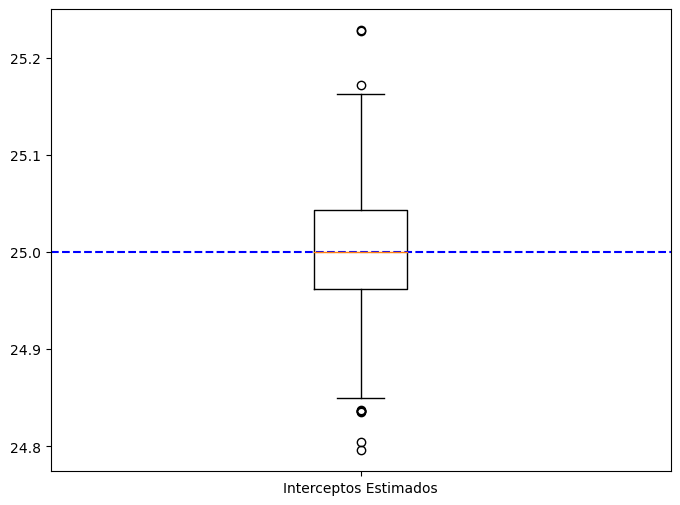

In [24]:
# Utilizamos Matplotlib
plt.figure(figsize=(8, 6))
plt.boxplot(interceptos_estimados, vert=True, labels=("Interceptos Estimados",))
plt.axhline(intercepto_real, color='blue', linestyle='--', label='Valor real del Intercepto')
plt.show()

In [25]:
# Con la intención de emplear la librería Seaborn guardamos los resultados de las estimaciones en un DataFrame
sns_df = pd.DataFrame(interceptos_estimados)
sns_df["B1^"] = pendientes_estimadas
sns_df.columns = ["B0^", "B1^"]

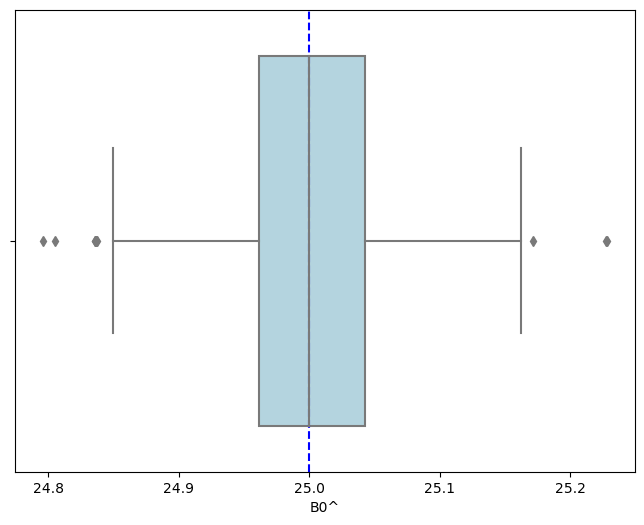

In [26]:
# Utilizamos Seaborn
plt.figure(figsize=(8, 6))
ax = sns.boxplot(data = sns_df, x = "B0^", color = "lightblue")
ax.axvline(x = intercepto_real, 
           linestyle = "dashed",
          color = "blue") 
plt.show()

## *Gráfico de Caja*
- β1

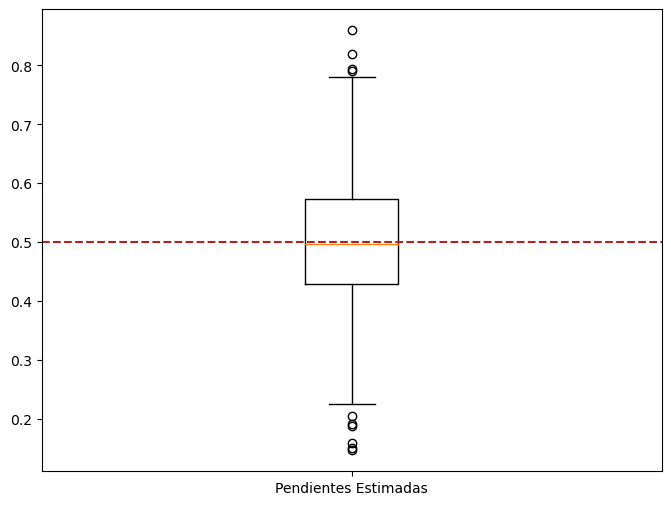

In [27]:
# Utilizamos Matplotlib
plt.figure(figsize=(8, 6))
plt.boxplot(pendientes_estimadas, vert=True, labels=("Pendientes Estimadas",))
plt.axhline(pendiente_real, color='firebrick', linestyle='--', label='Valor real de la Pendiente')
plt.show()

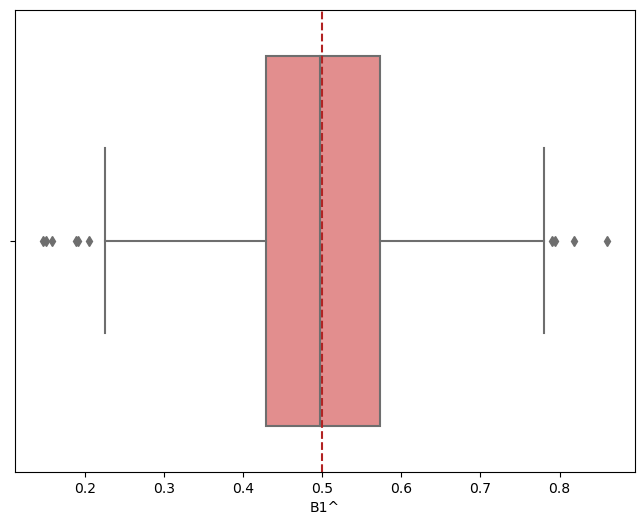

In [28]:
# Utilizamos Seaborn
plt.figure(figsize=(8, 6))
ax = sns.boxplot(data = sns_df, x = "B1^", color = "lightcoral")
ax.axvline(x = pendiente_real, 
           linestyle = "dashed",
          color = "firebrick") 
plt.show()

## *Gráfico de Puntos con Intervalos de Confianza*

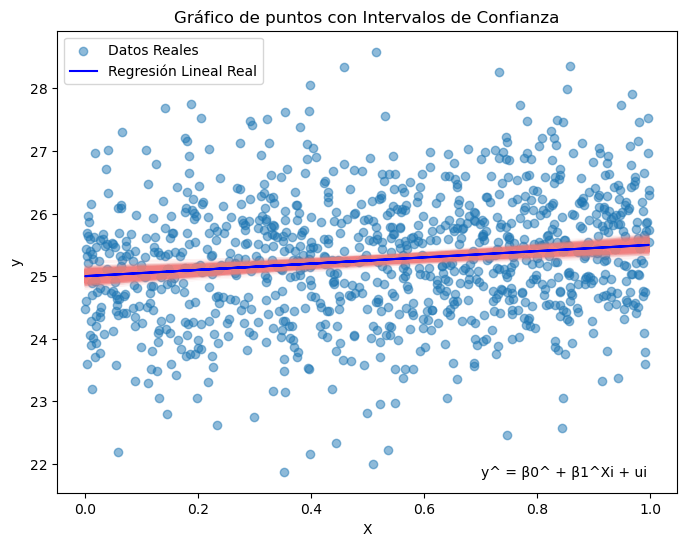

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.5, label='Datos Reales')
for i in range(num_experimentos):
    y_pred = interceptos_estimados[i] + pendientes_estimadas[i] * X
    plt.plot(X, y_pred, color='lightcoral', alpha=0.05)
plt.plot(X, intercepto_real + pendiente_real * X, color='blue', label='Regresión Lineal Real')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Gráfico de puntos con Intervalos de Confianza')
plt.text(0.7,21.8, "y^ = β0^ + β1^Xi + ui ")
plt.legend()
plt.show()

## *Histograma de la distribución simulada*

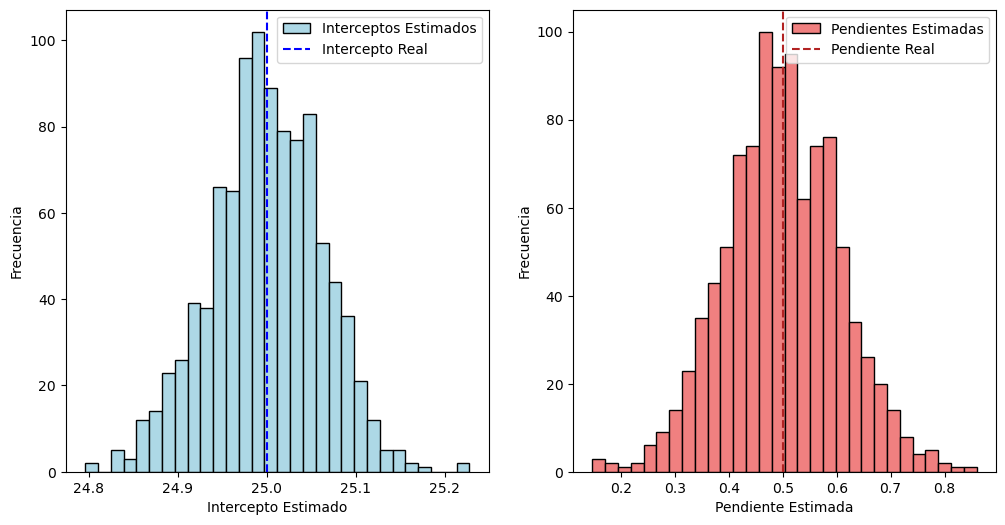

In [30]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(interceptos_estimados,color = "lightblue", bins=30, edgecolor='black', label='Interceptos Estimados')
plt.axvline(intercepto_real, color='blue', linestyle='--', label='Intercepto Real')
plt.xlabel('Intercepto Estimado')
plt.ylabel('Frecuencia')
plt.legend()
plt.subplot(1, 2, 2)
plt.hist(pendientes_estimadas, color = "lightcoral", bins=30, edgecolor='black', label='Pendientes Estimadas')
plt.axvline(pendiente_real, color='firebrick', linestyle='--', label='Pendiente Real')
plt.xlabel('Pendiente Estimada')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()